In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os, copy
import time
import OMRobjects as OMR
import imp
imp.reload(OMR)

%matplotlib inline

In [20]:
sheet_path = './data/You_to_me_me_to_you'
#sheet_path = './data/test_sheets'
sheets = [OMR.Sheet(os.path.join(sheet_path, page_path), order=i) for i, page_path in enumerate(sorted(os.listdir(sheet_path)))]

* Sheet Object Created :: Sheet #0 :: ./data/You_to_me_me_to_you/p1.png :: (1809, 1280)
* Sheet Object Created :: Sheet #1 :: ./data/You_to_me_me_to_you/p2.png :: (1809, 1280)
* Sheet Object Created :: Sheet #2 :: ./data/You_to_me_me_to_you/p3.png :: (1809, 1280)
* Sheet Object Created :: Sheet #3 :: ./data/You_to_me_me_to_you/p4.png :: (1809, 1280)


In [21]:
sample_idx = 0

In [22]:
sheets[sample_idx].preprocess_image(threshold=200)
sys_pos = sheets[sample_idx].create_system(sheets[sample_idx])

>>> Preprocessing Page #00 :: ./data/You_to_me_me_to_you/p1.png
* Deskewing :: PASS
* Resizing :: PASS
* Denoising :: PASS
* Inverse binary thresholding :: threshold=200
>>> Extracting systems : 5 systems
* System Object Created:: System #0 of [...you/p1.png] :: (x, y, w, h) = (83, 188, 1136, 230)
* System Object Created:: System #1 of [...you/p1.png] :: (x, y, w, h) = (79, 479, 1140, 220)
* System Object Created:: System #2 of [...you/p1.png] :: (x, y, w, h) = (80, 773, 1139, 238)
* System Object Created:: System #3 of [...you/p1.png] :: (x, y, w, h) = (83, 1070, 1136, 259)
* System Object Created:: System #4 of [...you/p1.png] :: (x, y, w, h) = (83, 1382, 1137, 247)


In [23]:
systems = sheets[sample_idx].systems
sample_idx = 0

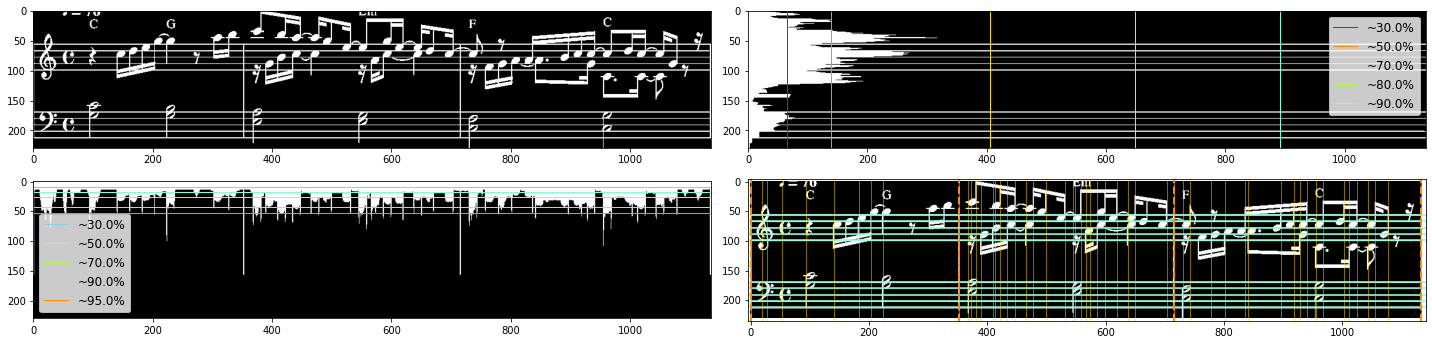

In [24]:
line_opt = ['red', 'darkorange', 'gold', 'greenyellow', 'aquamarine', 'skyblue']

fig = plt.figure(figsize=(20,5))
ax = plt.subplot2grid((2, 2), (0, 0))
ax.imshow(systems[sample_idx].image, cmap='gray')

axVis = plt.subplot2grid((2, 2), (1, 1))
axVis.imshow(systems[sample_idx].image, cmap='gray')

axr = plt.subplot2grid((2, 2), (0, 1))
histogram, grid, grid_idx = systems[sample_idx].get_pixel_histogram(depend_on='row')
axr.imshow(histogram, cmap='gray')

for i, x in enumerate(grid_idx):
    axr.axvline(x=x, color=line_opt[i], label=f'~{100*grid[i]:.1f}%', linewidth=1)
axr.legend(fontsize='large')

hline_pos, hthickness = systems[sample_idx].get_line_info(hist_by='row')
for y, t in zip(hline_pos, hthickness):
    axVis.axhline(y=y, color=line_opt[i])


axc = plt.subplot2grid((2, 2), (1, 0))
histogram, grid, grid_idx = systems[sample_idx].get_pixel_histogram(depend_on='col', grid=[0.3, 0.5, 0.7, 0.9, 0.95])
axc.imshow(histogram, cmap='gray')

for i, y in enumerate(grid_idx):
    axc.axhline(y=y, color=line_opt[-(i+1)], label=f'~{100*grid[i]:.1f}%', linewidth=1)
axc.legend(fontsize='large')

vline_pos, vthickness = systems[sample_idx].get_line_info(hist_by='col')
for x, t in zip(vline_pos, vthickness):
    axVis.axvline(x=x, color=line_opt[-i], linewidth=0.5)
    
vline_pos, vthickness = systems[sample_idx].check_bar()
for x, t in zip(vline_pos, vthickness):
    axVis.axvline(x=x, color=line_opt[-(i+1)], linestyle='--', linewidth=2)
    
axVis.set_ylim([-5, systems[sample_idx].shape[0]+5]); axVis.invert_yaxis()
axVis.set_xlim([-5, systems[sample_idx].shape[1]+5])

fig.set_tight_layout(True)
plt.show()

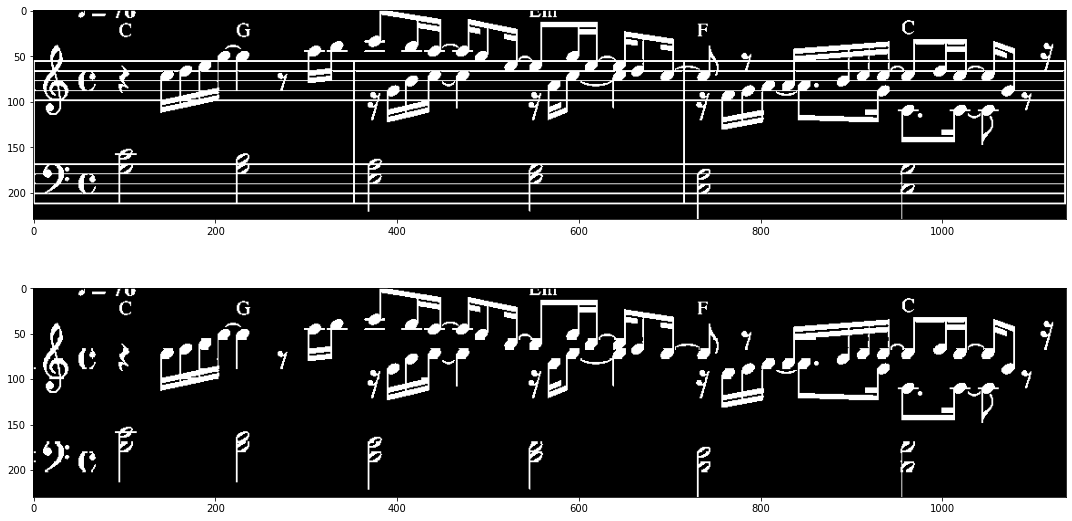

In [25]:
fig = plt.figure(figsize=(15,8))
axt = plt.subplot2grid((2, 1), (0, 0))
axt.imshow(systems[sample_idx].image, cmap='gray')

systems[sample_idx].reset_line_removed_image()
systems[sample_idx].remove_lines(hline_pos, hthickness, direction='hor')
systems[sample_idx].remove_lines(vline_pos, vthickness, direction='ver')

axb = plt.subplot2grid((2, 1), (1, 0))
axb.imshow(systems[sample_idx].image_line_removed, cmap='gray')

fig.set_tight_layout(True)
plt.show()

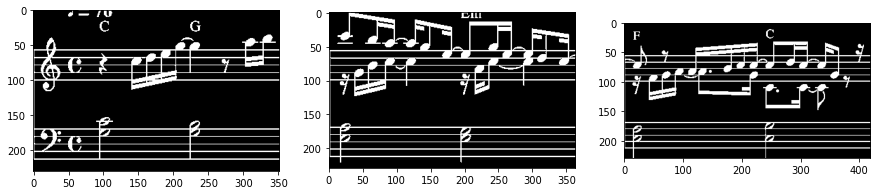

In [26]:
measures = systems[sample_idx].split_into_measures()
    
fig = plt.figure(figsize=(15,8))
for i, m in enumerate(measures):
    ax = fig.add_subplot(1, 3, i+1)
    ax.imshow(m, cmap='gray')


In [27]:
systems[sample_idx].create_staff_info()
print(len(systems[sample_idx].staves))

for st in systems[sample_idx].staves:
    print('-=-=-=-=-=-=-')
    print(st.pos)
    print(st.thickness)
    print(st.num_line)
    print(st.staff_type)

2
-=-=-=-=-=-=-
[56, 67, 78, 89, 99]
[2, 2, 1, 1, 2]
5
None
-=-=-=-=-=-=-
[169, 180, 191, 201, 212]
[2, 1, 1, 2, 2]
5
None
